# Week 7 - Random Forests and Anomaly Detection

Let's look into extending Decision Trees into proper Random Forests. We will also see how they can be modified to accomplish anomaly detection.


### Datset
We can simply bring in the cleaned data from last week's notebook.

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

Now let's import the Excel file and inspect the data

In [19]:
# load site data
df = pd.read_csv('./Wanyika_cleaned.csv')

In [20]:
df.head()

,Mean Chronology (Calibrated BP - 1950),Wild Terrestrial Fauna,Avian Fauna,Aquatic Fauna,Indet. Bones,Bovids,Cattle (Bos taurus/indicus),Sheep/Goat (Ovis/Capra Indet.),Iron Smelting,Iron Use,...,drycoastalwoodedgrassland,drynorthernwoodedgrassland,drysouthernwoodedgrassland,forest/wood/grasslandmosaic,montaneforest,comoros,kenya,madagascar,rwanda,tanzania
0,1470.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1475.5,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1562.5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1608.5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1193.5,1,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
df.keys()

Index(['Mean Chronology  (Calibrated BP - 1950) ', 'Wild Terrestrial Fauna ',
       'Avian Fauna ', 'Aquatic Fauna', 'Indet. Bones', 'Bovids',
       'Cattle (Bos taurus/indicus)', 'Sheep/Goat (Ovis/Capra Indet.)',
       'Iron Smelting', 'Iron Use', 'Ceramics', 'coastalforestmosaic',
       'drycoastalwoodedgrassland', 'drynorthernwoodedgrassland',
       'drysouthernwoodedgrassland', 'forest/wood/grasslandmosaic',
       'montaneforest', 'comoros', 'kenya', 'madagascar', 'rwanda',
       'tanzania'],
      dtype='object')

In [23]:
# set the  (the label we want to predict)
y = df['Mean Chronology  (Calibrated BP - 1950) ']

# set the X (the features we want the algorithm to learn from)
X = df.drop(columns=['Mean Chronology  (Calibrated BP - 1950) '])


In [ ]:
# Use sklearn to automatically make a test/train set from our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
# import functions to do cross fold validation
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 4, shuffle=True, random_state=0)

In [52]:
from sklearn.ensemble import RandomForestRegressor

K = range(1,20)
scores = []

for k in K:
    # Create Decision Tree Regressor object
    rf_reg = RandomForestRegressor(max_depth=k, random_state=0)

    # Train Decision Tree Regressor on our data
    score = cross_val_score(rf_reg, X, y, scoring='neg_mean_absolute_error', cv = k_folds).mean()
    scores.append(score)

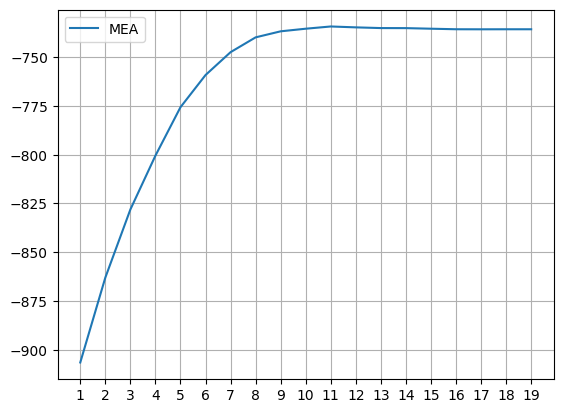

In [53]:
plt.plot(K, scores, label="MEA")
plt.xticks(ticks=K)
plt.grid()
plt.legend()

##### Question: If Random Forests always perform better, why would we ever want to use a normal Decision Tree?
##### Answer: When "explainability" is imperative, and also when we have extreme time/energy constraints.

## Isolation Forests
##### An Isolation Forest is an unsupervised ensemble method for finding unusual items in large amounts of data

#### It has been especially powerful for detecting instances of fraud, and monitoring systems for failure detection

In [ ]:
from sklearn.ensemble import IsolationForest

# We first fit it to our data. Contamination has to do with how many outliers we expect we may have

iso_forest = IsolationForest(n_estimators=100, contamination=0.002)
iso_forest.fit(X)

,n_estimators,100
,max_samples,'auto'
,contamination,0.002
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,None
,verbose,0
,warm_start,False


In [ ]:
# Now we can see which sites are the "strangest" (note I repeatedly adjusted contamination until I got very few)
np.where(iso_forest.predict(X) == -1)

(array([1081, 1082, 1083]),)

In [ ]:
# Note: An Isolation Forest will always find some anomalies, even in data that is actually normal.
# So don't just "randomly assume" that the data is anomalous without taking the time to check it.